# Exercise 5

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Question 1

Y    1365
N      95
Name: CentralAir, dtype: int64


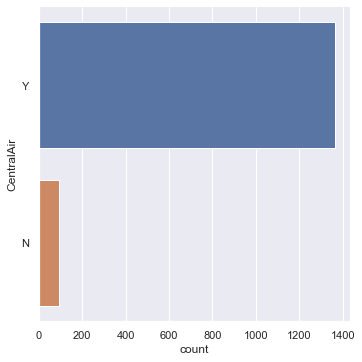

In [2]:
#a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

houseData = pd.read_csv('train.csv')
# Count Plot for CentralAir
sb.catplot(y = "CentralAir", data = houseData, kind = "count")
# Summary Statistics for CentralAir
print(houseData["CentralAir"].value_counts())

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

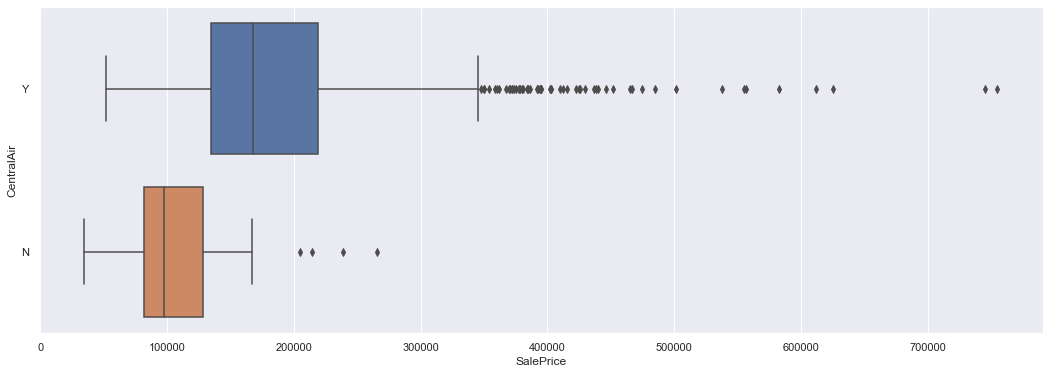

In [3]:
#b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

cA = pd.DataFrame(houseData['CentralAir'])
sP = pd.DataFrame(houseData['SalePrice'])

# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([sP, cA], axis = 1).reindex(sP.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h")

In [4]:
#c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [5]:
#d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sP_train, sP_test, cA_train, cA_test = train_test_split(sP, cA, test_size = 360)

In [6]:
#e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(sP_train, cA_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'SalePrice <= 98300.0\ngini = 0.114\nsamples = 1100\nvalue = [67, 1033]\nclass = Y'),
 Text(167.4, 326.16, 'SalePrice <= 62750.0\ngini = 0.497\nsamples = 74\nvalue = [34, 40]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.475\nsamples = 62\nvalue = [24, 38]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 115500.0\ngini = 0.062\nsamples = 1026\nvalue = [33, 993]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.248\nsamples = 76\nvalue = [11, 65]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.045\nsamples = 950\nvalue = [22, 928]\nclass = Y')]

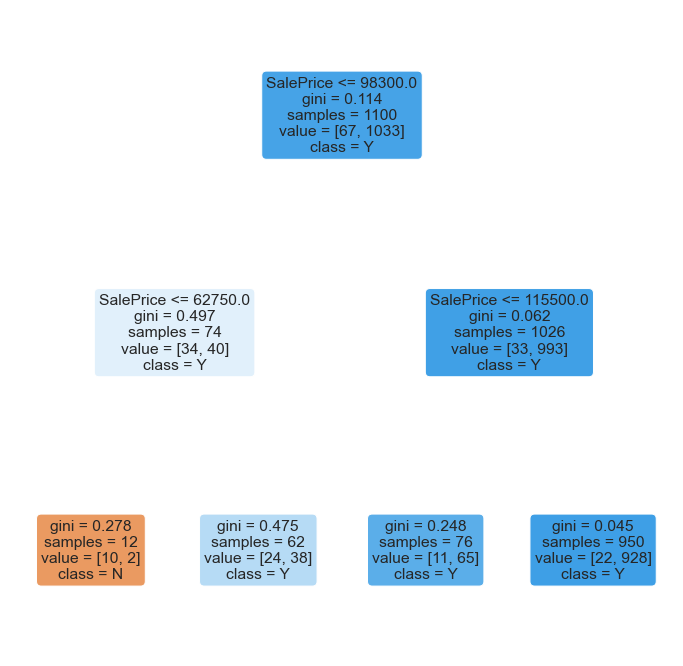

In [7]:
#f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=sP_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

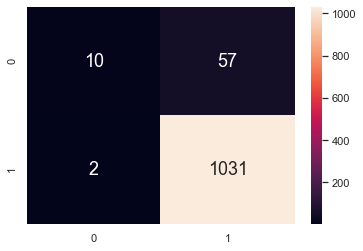

In [8]:
#g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

# Predict CentralAir corresponding to SalePrice Train
cA_train_pred = dectree.predict(sP_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_train, cA_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [9]:
#h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

# Print the Classification Accuracy
sP_train_CA = dectree.score(sP_train, cA_train)
print("Classification Accuracy \t:", sP_train_CA)

sP_train_tn, sP_train_fp, sP_train_fn, sP_train_tp = confusion_matrix(cA_train, cA_train_pred).ravel()
print("True Positive Rate =", sP_train_tp/(sP_train_tp + sP_train_fn))
print("True Negative Rate =", sP_train_tn/(sP_train_tn + sP_train_fp))
print("False Positive Rate =", sP_train_fp/(sP_train_tn + sP_train_fp))
print("False Negative Rate =", sP_train_fn/(sP_train_tp + sP_train_fn))

Classification Accuracy 	: 0.9463636363636364
True Positive Rate = 0.9980638915779284
True Negative Rate = 0.14925373134328357
False Positive Rate = 0.8507462686567164
False Negative Rate = 0.001936108422071636


<AxesSubplot:>

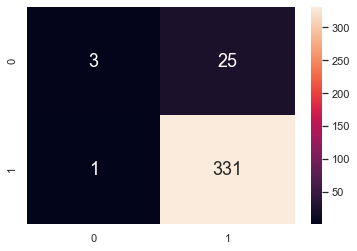

In [10]:
#i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix

# Predict CentralAir corresponding to SalePrice Test
cA_test_pred = dectree.predict(sP_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_test, cA_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [11]:
#j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

# Print the Classification Accuracy
sP_test_CA = dectree.score(sP_test, cA_test)
print("Classification Accuracy \t:", sP_test_CA)

sP_test_tn, sP_test_fp, sP_test_fn, sP_test_tp = confusion_matrix(cA_test, cA_test_pred).ravel()
print("True Positive Rate =", sP_test_tp/(sP_test_tp + sP_test_fn))
print("True Negative Rate =", sP_test_tn/(sP_test_tn + sP_test_fp))
print("False Positive Rate =", sP_test_fp/(sP_test_tn + sP_test_fp))
print("False Negative Rate =", sP_test_fn/(sP_test_tp + sP_test_fn))

Classification Accuracy 	: 0.9277777777777778
True Positive Rate = 0.9969879518072289
True Negative Rate = 0.10714285714285714
False Positive Rate = 0.8928571428571429
False Negative Rate = 0.0030120481927710845


## Question 2

### GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

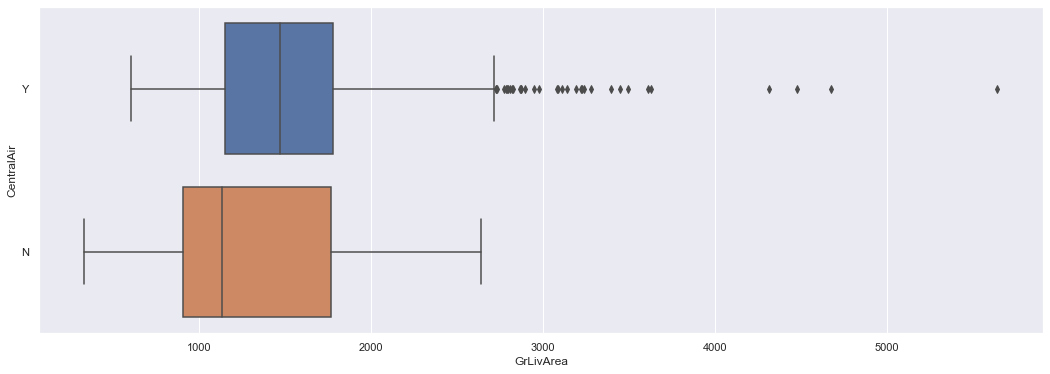

In [12]:
#b) Plot CentralAir against GrLivArea using any appropriate bivariate plot to note the mutual relationship.

cA = pd.DataFrame(houseData['CentralAir'])
gLA = pd.DataFrame(houseData['GrLivArea'])

# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([gLA, cA], axis = 1).reindex(gLA.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = trainDF, orient = "h")

In [13]:
#d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)

gLA_train, gLA_test, cA_train, cA_test = train_test_split(gLA, cA, test_size = 360)

In [14]:
#e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using GrLivArea.

dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(gLA_train, cA_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'GrLivArea <= 846.5\ngini = 0.116\nsamples = 1100\nvalue = [68, 1032]\nclass = Y'),
 Text(167.4, 326.16, 'GrLivArea <= 562.5\ngini = 0.411\nsamples = 52\nvalue = [15, 37]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.37\nsamples = 49\nvalue = [12, 37]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'GrLivArea <= 1056.5\ngini = 0.096\nsamples = 1048\nvalue = [53, 995]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.189\nsamples = 170\nvalue = [18, 152]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.077\nsamples = 878\nvalue = [35, 843]\nclass = Y')]

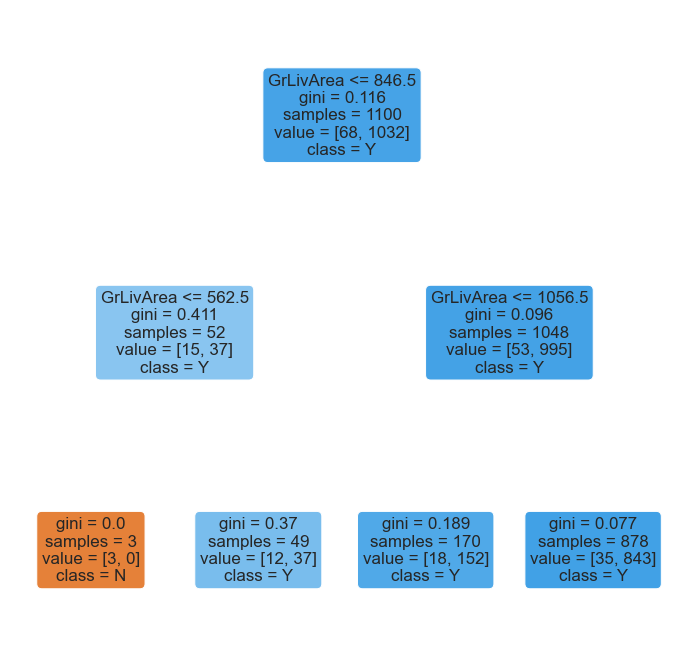

In [15]:
#f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=gLA_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

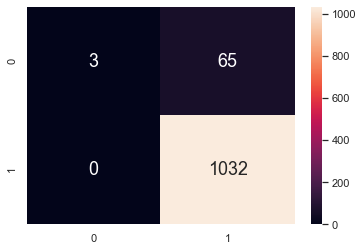

In [16]:
#g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

# Predict CentralAir corresponding to GrLivArea Train
cA_train_pred = dectree.predict(gLA_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_train, cA_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [17]:
#h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

# Print the Classification Accuracy
gLA_train_CA = dectree.score(gLA_train, cA_train)
print("Classification Accuracy \t:", gLA_train_CA)

gLA_train_tn, gLA_train_fp, gLA_train_fn, gLA_train_tp = confusion_matrix(cA_train, cA_train_pred).ravel()
print("True Positive Rate =", gLA_train_tp/(gLA_train_tp + gLA_train_fn))
print("True Negative Rate =", gLA_train_tn/(gLA_train_tn + gLA_train_fp))
print("False Positive Rate =", gLA_train_fp/(gLA_train_tn + gLA_train_fp))
print("False Negative Rate =", gLA_train_fn/(gLA_train_tp + gLA_train_fn))

Classification Accuracy 	: 0.9409090909090909
True Positive Rate = 1.0
True Negative Rate = 0.04411764705882353
False Positive Rate = 0.9558823529411765
False Negative Rate = 0.0


<AxesSubplot:>

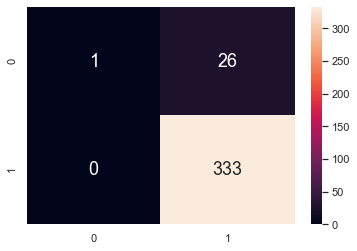

In [18]:
#i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix

# Predict CentralAir corresponding to GrLivArea Test
cA_test_pred = dectree.predict(gLA_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_test, cA_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [19]:
#j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

# Print the Classification Accuracy
gLA_test_CA = dectree.score(gLA_test, cA_test)
print("Classification Accuracy \t:", gLA_test_CA)

gLA_test_tn, gLA_test_fp, gLA_test_fn, gLA_test_tp = confusion_matrix(cA_test, cA_test_pred).ravel()
print("True Positive Rate =", gLA_test_tp/(gLA_test_tp + gLA_test_fn))
print("True Negative Rate =", gLA_test_tn/(gLA_test_tn + gLA_test_fp))
print("False Positive Rate =", gLA_test_fp/(gLA_test_tn + gLA_test_fp))
print("False Negative Rate =", gLA_test_fn/(gLA_test_tp + gLA_test_fn))

Classification Accuracy 	: 0.9277777777777778
True Positive Rate = 1.0
True Negative Rate = 0.037037037037037035
False Positive Rate = 0.9629629629629629
False Negative Rate = 0.0


### OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

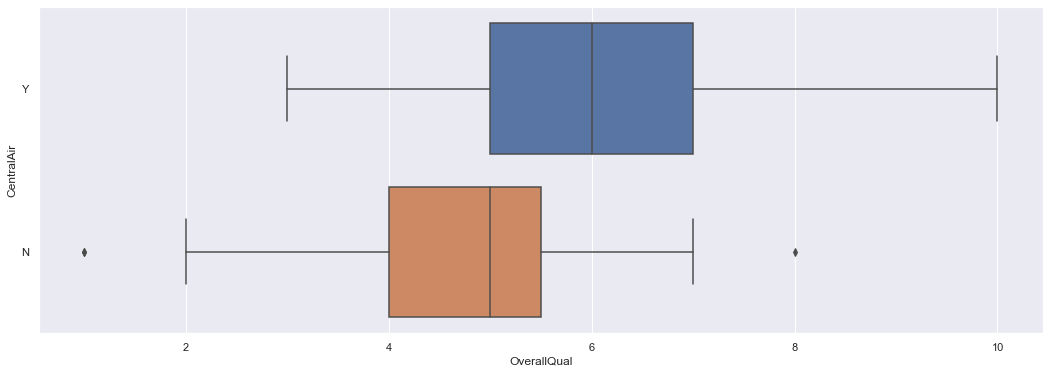

In [20]:
#b) Plot CentralAir against OverallQual using any appropriate bivariate plot to note the mutual relationship.

cA = pd.DataFrame(houseData['CentralAir'])
oQ = pd.DataFrame(houseData['OverallQual'])

# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([oQ, cA], axis = 1).reindex(oQ.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = trainDF, orient = "h")

In [21]:
#d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)

oQ_train, oQ_test, cA_train, cA_test = train_test_split(oQ, cA, test_size = 360)

In [22]:
#e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using OverallQual.

dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(oQ_train, cA_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'OverallQual <= 3.5\ngini = 0.121\nsamples = 1100\nvalue = [71, 1029]\nclass = Y'),
 Text(167.4, 326.16, 'OverallQual <= 2.5\ngini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = N'),
 Text(502.20000000000005, 326.16, 'OverallQual <= 4.5\ngini = 0.105\nsamples = 1084\nvalue = [60, 1024]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.312\nsamples = 88\nvalue = [17, 71]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.083\nsamples = 996\nvalue = [43, 953]\nclass = Y')]

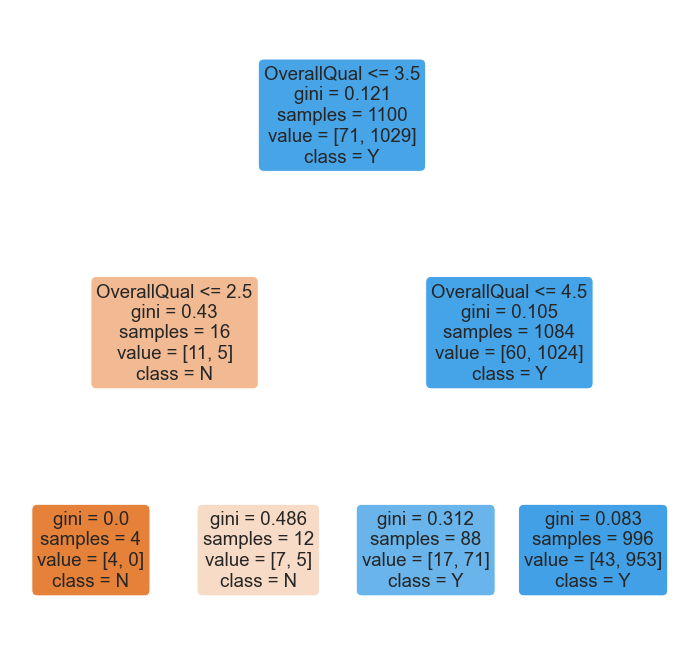

In [23]:
#f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=oQ_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

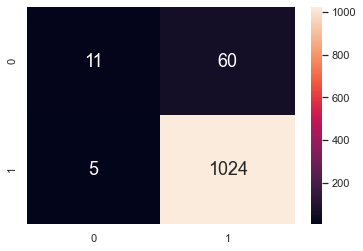

In [24]:
#g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

# Predict CentralAir corresponding to OverallQual Train
cA_train_pred = dectree.predict(oQ_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_train, cA_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [25]:
#h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

# Print the Classification Accuracy
oQ_train_CA = dectree.score(oQ_train, cA_train)
print("Classification Accuracy \t:", oQ_train_CA)

oQ_train_tn, oQ_train_fp, oQ_train_fn, oQ_train_tp = confusion_matrix(cA_train, cA_train_pred).ravel()
print("True Positive Rate =", oQ_train_tp/(oQ_train_tp + oQ_train_fn))
print("True Negative Rate =", oQ_train_tn/(oQ_train_tn + oQ_train_fp))
print("False Positive Rate =", oQ_train_fp/(oQ_train_tn + oQ_train_fp))
print("False Negative Rate =", oQ_train_fn/(oQ_train_tp + oQ_train_fn))

Classification Accuracy 	: 0.9409090909090909
True Positive Rate = 0.9951409135082604
True Negative Rate = 0.15492957746478872
False Positive Rate = 0.8450704225352113
False Negative Rate = 0.004859086491739553


<AxesSubplot:>

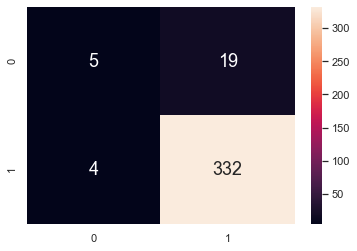

In [26]:
#i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix

# Predict CentralAir corresponding to OverallQual Test
cA_test_pred = dectree.predict(oQ_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_test, cA_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [27]:
#j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

# Print the Classification Accuracy
oQ_test_CA = dectree.score(oQ_test, cA_test)
print("Classification Accuracy \t:", oQ_test_CA)

oQ_test_tn, oQ_test_fp, oQ_test_fn, oQ_test_tp = confusion_matrix(cA_test, cA_test_pred).ravel()
print("True Positive Rate =", oQ_test_tp/(oQ_test_tp + oQ_test_fn))
print("True Negative Rate =", oQ_test_tn/(oQ_test_tn + oQ_test_fp))
print("False Positive Rate =", oQ_test_fp/(oQ_test_tn + oQ_test_fp))
print("False Negative Rate =", oQ_test_fn/(oQ_test_tp + oQ_test_fn))

Classification Accuracy 	: 0.9361111111111111
True Positive Rate = 0.9880952380952381
True Negative Rate = 0.20833333333333334
False Positive Rate = 0.7916666666666666
False Negative Rate = 0.011904761904761904


### YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

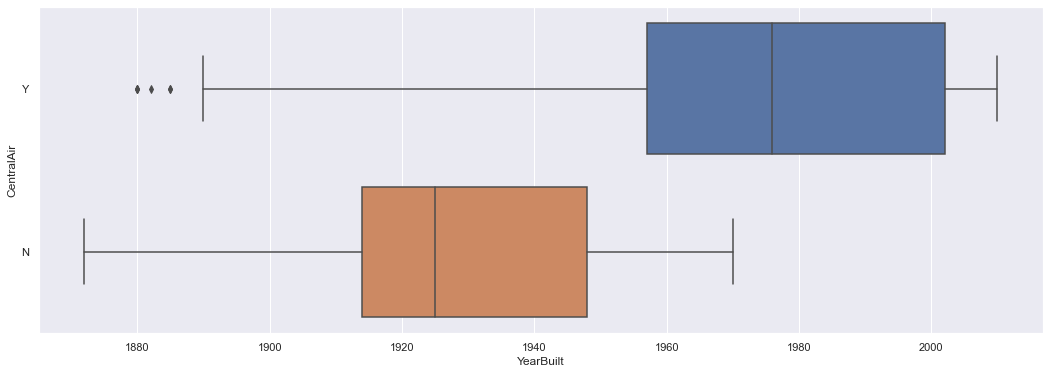

In [28]:
#b) Plot CentralAir against YearBuilt using any appropriate bivariate plot to note the mutual relationship.

cA = pd.DataFrame(houseData['CentralAir'])
yB = pd.DataFrame(houseData['YearBuilt'])

# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([yB, cA], axis = 1).reindex(yB.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = trainDF, orient = "h")

In [29]:
#d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows)

yB_train, yB_test, cA_train, cA_test = train_test_split(yB, cA, test_size = 360)

In [30]:
#e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using YearBuilt.

dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(yB_train, cA_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'YearBuilt <= 1952.5\ngini = 0.118\nsamples = 1100\nvalue = [69, 1031]\nclass = Y'),
 Text(167.4, 326.16, 'YearBuilt <= 1917.5\ngini = 0.36\nsamples = 255\nvalue = [60, 195]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.472\nsamples = 63\nvalue = [24, 39]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.305\nsamples = 192\nvalue = [36, 156]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'YearBuilt <= 1970.5\ngini = 0.021\nsamples = 845\nvalue = [9, 836]\nclass = Y'),
 Text(418.5, 108.72000000000003, 'gini = 0.067\nsamples = 261\nvalue = [9, 252]\nclass = Y'),
 Text(585.9, 108.72000000000003, 'gini = 0.0\nsamples = 584\nvalue = [0, 584]\nclass = Y')]

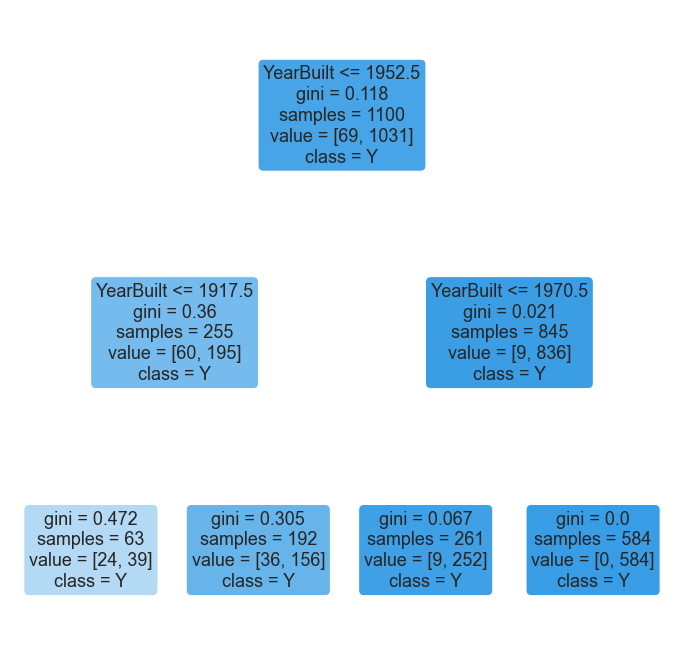

In [31]:
#f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=yB_train.columns, 
          class_names=["N","Y"])

<AxesSubplot:>

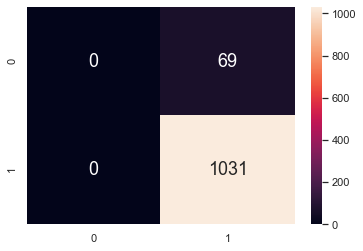

In [32]:
#g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

# Predict CentralAir corresponding to YearBuilt Train
cA_train_pred = dectree.predict(yB_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_train, cA_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [33]:
#h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

# Print the Classification Accuracy
yB_train_CA = dectree.score(yB_train, cA_train)
print("Classification Accuracy \t:", yB_train_CA)

yB_train_tn, yB_train_fp, yB_train_fn, yB_train_tp = confusion_matrix(cA_train, cA_train_pred).ravel()
print("True Positive Rate =", yB_train_tp/(yB_train_tp + yB_train_fn))
print("True Negative Rate =", yB_train_tn/(yB_train_tn + yB_train_fp))
print("False Positive Rate =", yB_train_fp/(yB_train_tn + yB_train_fp))
print("False Negative Rate =", yB_train_fn/(yB_train_tp + yB_train_fn))

Classification Accuracy 	: 0.9372727272727273
True Positive Rate = 1.0
True Negative Rate = 0.0
False Positive Rate = 1.0
False Negative Rate = 0.0


<AxesSubplot:>

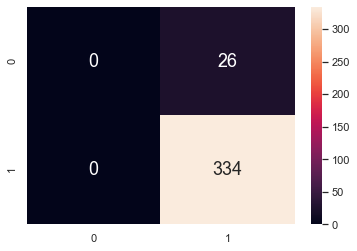

In [34]:
#i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix

# Predict CentralAir corresponding to YearBuilt Test
cA_test_pred = dectree.predict(yB_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(cA_test, cA_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [35]:
#j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
#   True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

# Print the Classification Accuracy
yB_test_CA = dectree.score(yB_test, cA_test)
print("Classification Accuracy \t:", yB_test_CA)

yB_test_tn, yB_test_fp, yB_test_fn, yB_test_tp = confusion_matrix(cA_test, cA_test_pred).ravel()
print("True Positive Rate =", yB_test_tp/(yB_test_tp + yB_test_fn))
print("True Negative Rate =", yB_test_tn/(yB_test_tn + yB_test_fp))
print("False Positive Rate =", yB_test_fp/(yB_test_tn + yB_test_fp))
print("False Negative Rate =", yB_test_fn/(yB_test_tp + yB_test_fn))

Classification Accuracy 	: 0.9277777777777778
True Positive Rate = 1.0
True Negative Rate = 0.0
False Positive Rate = 1.0
False Negative Rate = 0.0


## Question 3

In [36]:
#Comparison of classification accuracy, true positive rate and false positive rate
print("SalePrice:")
print("Train:")
print("Classification Accuracy \t:", sP_train_CA)
print("True Positive Rate =", sP_train_tp/(sP_train_tp + sP_train_fn))
print("False Positive Rate =", sP_train_fp/(sP_train_tn + sP_train_fp))
print("Test:")
print("Classification Accuracy \t:", sP_test_CA)
print("True Positive Rate =", sP_test_tp/(sP_test_tp + sP_test_fn))
print("False Positive Rate =", sP_test_fp/(sP_test_tn + sP_test_fp))

print("\nGrLivArea:")
print("Train:")
print("Classification Accuracy \t:", gLA_train_CA)
print("True Positive Rate =", gLA_train_tp/(gLA_train_tp + gLA_train_fn))
print("False Positive Rate =", gLA_train_fp/(gLA_train_tn + gLA_train_fp))
print("Test:")
print("Classification Accuracy \t:", gLA_test_CA)
print("True Positive Rate =", gLA_test_tp/(gLA_test_tp + gLA_test_fn))
print("False Positive Rate =", gLA_test_fp/(gLA_test_tn + gLA_test_fp))

print("\nOverallQual:")
print("Train:")
print("Classification Accuracy \t:", oQ_train_CA)
print("True Positive Rate =", oQ_train_tp/(oQ_train_tp + oQ_train_fn))
print("False Positive Rate =", oQ_train_fp/(oQ_train_tn + oQ_train_fp))
print("Test:")
print("Classification Accuracy \t:", oQ_test_CA)
print("True Positive Rate =", oQ_test_tp/(oQ_test_tp + oQ_test_fn))
print("False Positive Rate =", oQ_test_fp/(oQ_test_tn + oQ_test_fp))

print("\nYearBuilt:")
print("Train:")
print("Classification Accuracy \t:", yB_train_CA)
print("True Positive Rate =", yB_train_tp/(yB_train_tp + yB_train_fn))
print("False Positive Rate =", yB_train_fp/(yB_train_tn + yB_train_fp))
print("Test:")
print("Classification Accuracy \t:", yB_test_CA)
print("True Positive Rate =", yB_test_tp/(yB_test_tp + yB_test_fn))
print("False Positive Rate =", yB_test_fp/(yB_test_tn + yB_test_fp))

SalePrice:
Train:
Classification Accuracy 	: 0.9463636363636364
True Positive Rate = 0.9980638915779284
False Positive Rate = 0.8507462686567164
Test:
Classification Accuracy 	: 0.9277777777777778
True Positive Rate = 0.9969879518072289
False Positive Rate = 0.8928571428571429

GrLivArea:
Train:
Classification Accuracy 	: 0.9409090909090909
True Positive Rate = 1.0
False Positive Rate = 0.9558823529411765
Test:
Classification Accuracy 	: 0.9277777777777778
True Positive Rate = 1.0
False Positive Rate = 0.9629629629629629

OverallQual:
Train:
Classification Accuracy 	: 0.9409090909090909
True Positive Rate = 0.9951409135082604
False Positive Rate = 0.8450704225352113
Test:
Classification Accuracy 	: 0.9361111111111111
True Positive Rate = 0.9880952380952381
False Positive Rate = 0.7916666666666666

YearBuilt:
Train:
Classification Accuracy 	: 0.9372727272727273
True Positive Rate = 1.0
False Positive Rate = 1.0
Test:
Classification Accuracy 	: 0.9277777777777778
True Positive Rate = 1.0

#### All 4 models have very similar classification accuracies at about 0.93-0.95 and true positive rates of close to 1, but the false positive rate for OverallQual is the lowest among the 4 models at approximately 0.80-0.86. The other models on the other hand have a false positive rate of 0.85 and above. Therefore OverallQual is the best model to predict CentralAir.